In [1]:
## Import dependencies
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from flask import Flask, jsonify, render_template
from sklearn.linear_model import LinearRegression
import yfinance as yf
from pathlib import Path
from pprint import pprint

## Get our data: 
### - Pull historical data for each ticker using the yfinance python library
### - Export each ticker's data to a separate csv file

In [ ]:
## Pull Stock Data using yfinance library
## Loop through list of tickers to pull the daily closing price and date for the last 10 years for each ticker
tickers = ['^GSPC', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'ALL', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APT', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AVGO', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'BR', 'BF.B', 'BEN', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'COO', 'CPRT', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'CRM', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'DVN', 'DXCM', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'DGX', 'DIS', 'ED', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'FANG', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'FCX', 'GOOGL', 'GOOG', 'GLW', 'GPS', 'GRMN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IT', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KMX', 'KO', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LNT', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'LUV', 'MMM', 'MO', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NOV', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'NOW', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OTIS', 'O', 'PEAK', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG', 'PSA', 'PHM', 'PVH', 'PWR', 'QRVO', 'QCOM', 'RE', 'RL', 'RJF', 'RTX', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SCHW', 'STZ', 'SJM', 'SPGI', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'T', 'TAP', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XRAY', 'XOM', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']
for ticker in tickers:
    ticker_data_df= yf.download(tickers = ticker, start="2011-01-01")
    ticker_df = ticker_data_df[["Close"]]
    ticker_df.reset_index(level=0, inplace=True)
## Export each ticker's data into it's own separate csv file
    ticker_df.to_csv(f"resources/data_tickers/{ticker}.csv")

## Calculate linear regression for market
### Market ticker symbol: ^GSPC

In [3]:
## Create path to sp500 csv and import data to dataframe
market_path = "resources/data_tickers/^GSPC.csv"
market_df = pd.read_csv(market_path)
## Rename index column from 'Unnamed: 0' to 'Day Number' 
    ##(header for index is blank in csv file, couldn't figure out how to fix in initial loop before exporting data to CSVs)
## Rename closing price column from 'Close' to 'Price'
market_df.rename(columns={'Unnamed: 0': 'Day Number', 
                          'Date': 'Date', 
                          'Close': 'Price'}, inplace = True)
## Check to make sure columns were renamed
market_df.head()

,Day Number,Date,Price
0,0,2011-01-03,1271.869995
1,1,2011-01-04,1270.199951
2,2,2011-01-05,1276.560059
3,3,2011-01-06,1273.849976
4,4,2011-01-07,1271.500000


In [9]:
market_file = "resources/data_tickers/^GSPC.csv"
## Use linear regression to find slope and y intercept of sp500 data
market_model = LinearRegression()
market_model.fit(np.array(market_df["Day Number"]).reshape(-1,1), market_df["Price"])
market_slope = market_model.coef_
market_intercept = market_model.intercept_
market_file_name = str(market_file).replace('^GSPC', 'Market').replace('.csv','').replace('resources/data_tickers/','')
#print(f"{file_name}: y = {(slope)}x + {intercept}")
print(f"{market_file_name}: slope = {(market_slope)}")

Market: slope = [0.91498815]


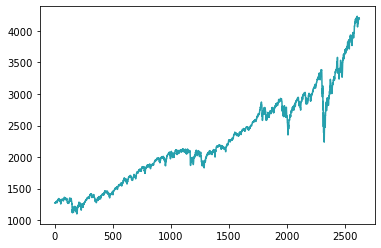

In [15]:
## Plot market data
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad")

In [11]:
## Calculate regression line of market
market_reg = [market_slope * day + market_intercept for day in market_df["Day Number"]]

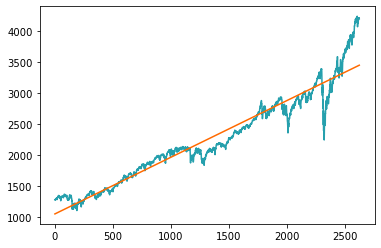

In [16]:
## Plot market data and market regression line
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad")
plt.plot(market_df["Day Number"], market_reg, c="#ff6a00")

## Calculate linear regressions: slopes, y-intercepts, and scores
### - Loop through all csvs in data_tickers folder:

In [17]:
## Create empty lists to store stocks and their slopes
all_stocks = []
winning_stocks = []
losing_stocks = []

In [18]:
## Define error log file
error_log = open("errors.log", "a")
error_count = 0
## Use pathlib to loop through all csvs in data_tickers folder 
folder = "resources/data_tickers"
for file in Path(folder).glob('*.csv'):
    ## Create empty lists to store slopes for all stocks, winning stocks, and losing stocks
    try:
        stock_df = pd.read_csv(file)
        stock_df.rename(columns={'Unnamed: 0': 'Day Number', 
                               'Date': 'Date', 
                               'Close': 'Price'}, inplace = True)
        ## Use linear regression to find slope and y intercept of sp500 data
        stock_model = LinearRegression()
        stock_model.fit(np.array(stock_df["Day Number"]).reshape(-1,1), stock_df["Price"])
        stock_slope = stock_model.coef_
        stock_intercept = stock_model.intercept_
        file_name = str(file).replace('.csv','').replace('resources\\data_tickers\\','')
        #print(f"{file_name}: y = {(slope)}x + {intercept}")
        print(f"{file_name}: slope = {(stock_slope)}")
        ## Append all stock slopes to list called 'all_stocks'
        all_stocks.append({'Stock': file_name, "Slope": stock_slope})
            
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1
     ## If else for winning stocks
    if stock_slope > market_slope:
        winning_stocks.append({'Stock': file_name, "Slope": stock_slope})
    else:
        losing_stocks.append({'Stock': file_name, "Slope": stock_slope})
        
error_log.close()
print(f"Encountered {error_count} errors")
        


A: slope = [0.03063236]
AAL: slope = [0.0066109]
AAP: slope = [0.03719664]
AAPL: slope = [0.03298015]
ABBV: slope = [0.02812349]
ABC: slope = [0.024322]
ABMD: slope = [0.13500067]
ABT: slope = [0.03073576]
ACN: slope = [0.07411831]
ADBE: slope = [0.16614071]
ADI: slope = [0.04015954]
ADM: slope = [0.00656298]
ADP: slope = [0.05449563]
ADSK: slope = [0.08447173]
AEE: slope = [0.02204718]
AEP: slope = [0.02205128]
AES: slope = [0.00272367]
AFL: slope = [0.01099956]
AIG: slope = [0.00476657]
AIZ: slope = [0.03961707]
AJG: slope = [0.03142248]
AKAM: slope = [0.02662491]
ALB: slope = [0.02289116]
ALGN: slope = [0.16063617]
ALK: slope = [0.0188232]
ALL: slope = [0.03419978]
ALLE: slope = [0.03929961]
ALXN: slope = [0.01609053]
AMAT: slope = [0.02734966]
AMCR: slope = [0.00093285]
AMD: slope = [0.02316715]
AME: slope = [0.03084674]
AMGN: slope = [0.07144356]
AMP: slope = [0.04958013]
AMT: slope = [0.07632826]
AMZN: slope = [1.10420699]
ANET: slope = [0.14947617]
ANSS: slope = [0.09865124]
ANT

MSFT: slope = [0.07133312]
MSI: slope = [0.053332]
MTB: slope = [0.02929939]
MTD: slope = [0.34887538]
MU: slope = [0.02253544]
MXIM: slope = [0.02063008]
NCLH: slope = [-0.0010625]
NDAQ: slope = [0.04447269]
NEE: slope = [0.02245973]
NEM: slope = [0.00117379]
NFLX: slope = [0.19675806]
NI: slope = [0.00853334]
NKE: slope = [0.03805027]
NLOK: slope = [0.0017843]
NLSN: slope = [-0.00520767]
NOC: slope = [0.13428268]
NOV: slope = [-0.02443558]
NOW: slope = [0.193258]
NRG: slope = [0.00616273]
NSC: slope = [0.06466784]
NTAP: slope = [0.01011602]
NTRS: slope = [0.02424427]
NUE: slope = [0.0073591]
NVDA: slope = [0.16990289]
NVR: slope = [1.47335292]
NWL: slope = [0.0003664]
NWS: slope = [-7.26809357e-05]
NWSA: slope = [-6.75386974e-05]
NXPI: slope = [0.0505871]
O: slope = [0.01372911]
ODFL: slope = [0.06590627]
OKE: slope = [0.00776482]
OMC: slope = [0.00919801]
ORCL: slope = [0.01255304]
ORLY: slope = [0.16238578]
OTIS: slope = [0.08643041]
OXY: slope = [-0.02567861]
PAYC: slope = [0.2099

In [19]:
pprint(all_stocks)

[{'Slope': array([0.03063236]), 'Stock': 'A'},
 {'Slope': array([0.0066109]), 'Stock': 'AAL'},
 {'Slope': array([0.03719664]), 'Stock': 'AAP'},
 {'Slope': array([0.03298015]), 'Stock': 'AAPL'},
 {'Slope': array([0.02812349]), 'Stock': 'ABBV'},
 {'Slope': array([0.024322]), 'Stock': 'ABC'},
 {'Slope': array([0.13500067]), 'Stock': 'ABMD'},
 {'Slope': array([0.03073576]), 'Stock': 'ABT'},
 {'Slope': array([0.07411831]), 'Stock': 'ACN'},
 {'Slope': array([0.16614071]), 'Stock': 'ADBE'},
 {'Slope': array([0.04015954]), 'Stock': 'ADI'},
 {'Slope': array([0.00656298]), 'Stock': 'ADM'},
 {'Slope': array([0.05449563]), 'Stock': 'ADP'},
 {'Slope': array([0.08447173]), 'Stock': 'ADSK'},
 {'Slope': array([0.02204718]), 'Stock': 'AEE'},
 {'Slope': array([0.02205128]), 'Stock': 'AEP'},
 {'Slope': array([0.00272367]), 'Stock': 'AES'},
 {'Slope': array([0.01099956]), 'Stock': 'AFL'},
 {'Slope': array([0.00476657]), 'Stock': 'AIG'},
 {'Slope': array([0.03961707]), 'Stock': 'AIZ'},
 {'Slope': array([0.

In [20]:
pprint(winning_stocks)

[{'Slope': array([1.10420699]), 'Stock': 'AMZN'},
 {'Slope': array([1.47335292]), 'Stock': 'NVR'}]


In [21]:
pprint(losing_stocks)

[{'Slope': array([0.03063236]), 'Stock': 'A'},
 {'Slope': array([0.0066109]), 'Stock': 'AAL'},
 {'Slope': array([0.03719664]), 'Stock': 'AAP'},
 {'Slope': array([0.03298015]), 'Stock': 'AAPL'},
 {'Slope': array([0.02812349]), 'Stock': 'ABBV'},
 {'Slope': array([0.024322]), 'Stock': 'ABC'},
 {'Slope': array([0.13500067]), 'Stock': 'ABMD'},
 {'Slope': array([0.03073576]), 'Stock': 'ABT'},
 {'Slope': array([0.07411831]), 'Stock': 'ACN'},
 {'Slope': array([0.16614071]), 'Stock': 'ADBE'},
 {'Slope': array([0.04015954]), 'Stock': 'ADI'},
 {'Slope': array([0.00656298]), 'Stock': 'ADM'},
 {'Slope': array([0.05449563]), 'Stock': 'ADP'},
 {'Slope': array([0.08447173]), 'Stock': 'ADSK'},
 {'Slope': array([0.02204718]), 'Stock': 'AEE'},
 {'Slope': array([0.02205128]), 'Stock': 'AEP'},
 {'Slope': array([0.00272367]), 'Stock': 'AES'},
 {'Slope': array([0.01099956]), 'Stock': 'AFL'},
 {'Slope': array([0.00476657]), 'Stock': 'AIG'},
 {'Slope': array([0.03961707]), 'Stock': 'AIZ'},
 {'Slope': array([0.

 {'Slope': array([0.07692028]), 'Stock': 'V'},
 {'Slope': array([0.02128122]), 'Stock': 'VFC'},
 {'Slope': array([0.00341256]), 'Stock': 'VIAC'},
 {'Slope': array([0.02483087]), 'Stock': 'VLO'},
 {'Slope': array([0.04813186]), 'Stock': 'VMC'},
 {'Slope': array([-0.00444897]), 'Stock': 'VNO'},
 {'Slope': array([0.05603205]), 'Stock': 'VRSK'},
 {'Slope': array([0.07681866]), 'Stock': 'VRSN'},
 {'Slope': array([0.08112762]), 'Stock': 'VRTX'},
 {'Slope': array([-0.00817471]), 'Stock': 'VTR'},
 {'Slope': array([-0.00352796]), 'Stock': 'VTRS'},
 {'Slope': array([0.00759761]), 'Stock': 'VZ'},
 {'Slope': array([0.01579318]), 'Stock': 'WAB'},
 {'Slope': array([0.07203646]), 'Stock': 'WAT'},
 {'Slope': array([0.00632341]), 'Stock': 'WBA'},
 {'Slope': array([0.00450438]), 'Stock': 'WDC'},
 {'Slope': array([0.0259258]), 'Stock': 'WEC'},
 {'Slope': array([0.00588327]), 'Stock': 'WELL'},
 {'Slope': array([0.00398475]), 'Stock': 'WFC'},
 {'Slope': array([0.03477227]), 'Stock': 'WHR'},
 {'Slope': arra

In [22]:
all_stocks_df = all_stocks.DataFrame({'Stock': file_name, "Slope": stock_slope}) 

AttributeError: 'list' object has no attribute 'DataFrame'

In [ ]:
## Define error log file
error_log = open("errors.log", "a")
error_count = 0
## Use pathlib to loop through all csvs in data_tickers folder 
folder = "resources/data_tickers"
for file in Path(folder).glob('*.csv'):
    all_stocks_columns = ['Stock', 'Slope']
    all_stocks_df = pd.DataFrame(columns = all_stocks_columns) 
    ## Create empty lists to store slopes for all stocks, winning stocks, and losing stocks
    try:
        stock_df = pd.read_csv(file)
        stock_df.rename(columns={'Unnamed: 0': 'Day Number', 
                               'Date': 'Date', 
                               'Close': 'Price'}, inplace = True)
        ## Use linear regression to find slope and y intercept of sp500 data
        stock_model = LinearRegression()
        stock_model.fit(np.array(stock_df["Day Number"]).reshape(-1,1), stock_df["Price"])
        stock_slope = stock_model.coef_
        stock_intercept = stock_model.intercept_
        file_name = str(file).replace('.csv','').replace('resources\\data_tickers\\','')
        #print(f"{file_name}: y = {(slope)}x + {intercept}")
        print(f"{file_name}: slope = {(stock_slope)}")
        ## Append all stock slopes to list called 'all_stocks'
        all_stocks.append({'Stock': file_name, "Slope": stock_slope})
            
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1
     ## If else for winning stocks
    if stock_slope > market_slope:
        winning_stocks.append({'Stock': file_name, "Slope": stock_slope})
    else:
        losing_stocks.append({'Stock': file_name, "Slope": stock_slope})
        
error_log.close()
print(f"Encountered {error_count} errors")
        


In [ ]:
all_stocks_columns = ['Stock', 'Slope']
    all_stocks_df = pd.DataFrame(columns = all_stocks_columns) 